In [1]:
# 规总化
import d2l
from mxnet import np,npx,gluon
npx.set_np()
import pandas as pd
import sys
d2l.use_svg_display()

In [2]:
mnist_train = gluon.data.vision.FashionMNIST(train=True)
mnist_test = gluon.data.vision.FashionMNIST(train=False)

In [3]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [4]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

In [5]:
def show_images(imgs,num_rows,num_cols,titles=None,scale=1.5):
    '''Plot a list of images.'''
    figsize = (num_cols * scale,num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows,num_cols,figsize=figsize)
    axes = axes.flatten()
    for i ,(ax,img) in enumerate(zip(axes,imgs)):
        ax.imshow(img.asnumpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dd8d15470>,
      dtype=object)

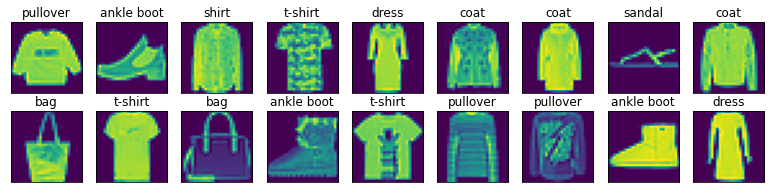

In [6]:
X,y = mnist_train[:18]
show_images(X.squeeze(axis=-1),2,9,titles=get_fashion_mnist_labels(y))

In [7]:
# Reading aMinibatch
def get_dataloader_workers(num_workers=4):
        return 1

In [8]:
batch_size = 256
transformer = gluon.data.vision.transforms.ToTensor()
train_iter = gluon.data.DataLoader(mnist_train.transform_first(transformer),batch_size,shuffle= True,num_workers=get_dataloader_workers())

In [9]:
timer = d2l.Timer()
for X,y in train_iter:
    continue
"%.2f sec" % timer.stop()

'13.93 sec'

In [10]:
# Putting all things together
def load_data_fashion_mnist(batch_size,resize=None):
    '''Download the Fashion_MNIST dataset and then load into memory'''
    dataset = gluon.data.vision
    trans = [dataset.transforms.Resize(resize)] if resize else []
    trans = dataset.transforms.Compose(trans)
    mnist_train = dataset.FashionMNIST(train=True).transform_first(trans)
    mnist_test = dataset.FashionMNIST(train=False).transform_first(trans)
    return (gluon.data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),
           gluon.data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_workers()))

In [11]:
train_iter,test_iter = load_data_fashion_mnist(32,(64,64))
for X,y in train_iter:
    print(X.shape)
    break

(32, 64, 64, 1)


In [12]:
num_inputs = 784
num_outputs = 10

W = np.random.normal(0,0.01,(num_inputs,num_outputs))
b = np.zeros(num_outputs)

In [13]:
W.attach_grad()
b.attach_grad()

In [14]:
def softmax(X):
    X_exp = np.exp(X)
    partition = X_exp.sum(axis=1,keepdims=True)
    return X_exp/partition # The broadcst mechanism is applied here

In [15]:
X = np.random.normal(size=(2,5))
X_prob = softmax(X)
X_prob,X_prob.sum(axis=1)

(array([[0.22376052, 0.06659239, 0.06583703, 0.29964197, 0.3441681 ],
        [0.63209665, 0.03179282, 0.194987  , 0.09209415, 0.04902935]]),
 array([1.        , 0.99999994]))

In [16]:
# The Model
def net(X):
    return softmax(np.dot(X.reshape(-1,num_inputs),W)+b)

In [17]:
# The Loss Function
y_hat = np.array([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y_hat[[0,1],[0,2]]

array([0.1, 0.5])

In [18]:
# cross-entropy loss function
def cross_entropy(y_hat,y):
    return -np.log(y_hat[range(len(y_hat)),y])

In [19]:
# Classification  Accuracy

In [20]:
def accuracy(y_hat,y):
    if y_hat.shape[1] >1:
        return float((y_hat.argmax(axis=1).astype('float32') == y.astype('float32')).sum())
    else:
        return float((y_hat.astype('int32')==y.astype('int32')).sum())

In [21]:
y = np.array([0,2])
accuracy(y_hat,y)/len(y)

0.5

In [22]:
def evaluate_accuracy(net,data_iter):
    metric = Accumulator(2)
    for X,y in data_iter:
        metric.add(accuracy(net(X),y),y.size)
    return metric[0]/metric[1]

In [23]:
class Accumulator:
    '''Sum a list of number over time'''
    def __init__(self,n):
        self.data = [0.0]*n
    def add(self,*args):
        self.data = [a+float(b) for a,b in zip(self.data,args)]
    def reset(self):
        self.data = [0]* len(self.data)
    def __getitem__(self,idx):
        return self.data[idx]

In [ ]:
evaluate_accuracy(net,test_iter)

4

In [ ]:
# M